In [1]:
import os
os.chdir('../')

In [89]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import contextily as cx
import matplotlib as mpl
from matplotlib.colors import ListedColormap

#### gadm1_geo contains geometries of all African countries

In [7]:
gadm_1_geo = gpd.read_file("combined_dataset/GADM_1_geometries.gpkg")

In [50]:
gadm_1_geo.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,GID_1,geometry
0,201,SEN,Senegal,1,Dakar,SN.DK,1,1,Région,Region,NaN,Cap Vert|Dacar,SEN1,"MULTIPOLYGON (((-17.46736 14.65097, -17.46736 ..."
1,201,SEN,Senegal,2,Diourbel,SN.DB,3,3,Région,Region,NaN,NaN,SEN2,"MULTIPOLYGON (((-15.84044 15.01466, -15.84110 ..."
2,201,SEN,Senegal,3,Fatick,SN.FK,9,9,Région,Region,NaN,NaN,SEN3,"MULTIPOLYGON (((-16.65375 13.64958, -16.65375 ..."
3,201,SEN,Senegal,4,Kédougou,SN.KG,13,13,Région,Region,NaN,Sénégal Oriental,SEN4,"POLYGON ((-12.23999 13.46066, -12.23863 13.459..."
4,201,SEN,Senegal,5,Kaffrine,SN.KF,12,12,Région,Region,NaN,NaN,SEN5,"POLYGON ((-15.29872 14.67901, -15.26830 14.661..."


In [9]:
gadm_1_geo.GID_1.nunique()

857

In [51]:
gadm_1_geo[gadm_1_geo.NAME_0.str.startswith("West")]

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,GID_1,geometry
827,253,ESH,Western Sahara,1,Boujdour,EH.BO,0,NaN,Willaya,Province,NaN,Bojador,ESH1,"POLYGON ((-14.83708 25.22569, -14.83708 25.226..."
828,253,ESH,Western Sahara,2,Es Semara,EH.ES,0,NaN,Willaya,Province,NaN,Smara,ESH2,"POLYGON ((-8.67387 27.29807, -8.67248 27.28832..."
829,253,ESH,Western Sahara,3,Laayoune,EH.LA,0,NaN,Willaya,Province,NaN,El aaiún,ESH3,"POLYGON ((-13.82375 26.56514, -13.82375 26.565..."
830,253,ESH,Western Sahara,4,Oued el Dahab,EH.OD,0,NaN,Willaya,Province,NaN,Ed Dakhla|Oued Eddahab,ESH4,"MULTIPOLYGON (((-16.47403 22.36958, -16.47403 ..."


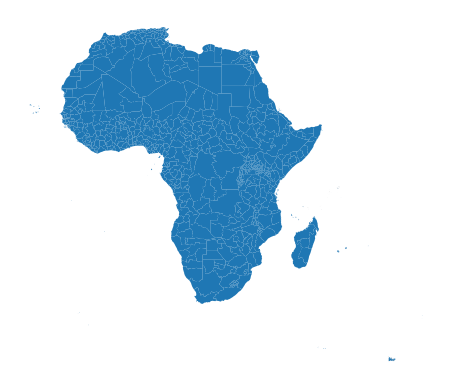

In [12]:
gadm_1_geo.plot()
plt.axis("off")
plt.show()

### SCI generated features

In [59]:
raw_sci = pd.read_csv("../external_dataset/Meta_sci_data/gadm1_nuts3_counties-gadm1_nuts3_counties - FB Social Connectedness Index - October 2021.tsv", delimiter='\t')

In [60]:
raw_sci.head()

,user_loc,fr_loc,scaled_sci
0,ABW,ABW,11264841
1,ABW,AGO1,38
2,ABW,AGO10,34
3,ABW,AGO11,32
4,ABW,AGO12,23


In [62]:
raw_sci[raw_sci.fr_loc.str.startswith("ESH")]

,user_loc,fr_loc,scaled_sci


In [13]:
sci = pd.read_csv("external_dataset/sci_indices.csv")

In [15]:
sci.head()

,Unnamed: 0,user_loc,Mean_friendship,Median_friendship,Std_friendship,Total_friendship,Mean_SCI_with_Self,Median_SCI_with_Self,Std_SCI_with_Self,SCI,...,Median_dist_to_SCI_km,Std_dist_to_SCI_km,Total_dist_to_SCI_km,Ratio_selfloop_to_country,Ratio_selfloop_to_africa,Ratio_selfloop_to_all_sci,Average_distance_of_friendships_km,Ratio_SCI_low_hi_africa,Ratio_SCI_middle_hi_africa,Ratio_SCI_high_hi_africa
0,0,AGO1,2.174454e+09,17748500.0,4.285777e+10,1.543862e+12,2610.911879,18.0,152077.386439,20858575,...,2657.313394,1321.425432,2.152826e+06,0.688941,0.658272,0.647544,292.448587,0.984887,0.004676,0.003234
1,1,AGO10,2.481131e+09,19108500.0,3.520447e+10,1.761603e+12,2021.547252,15.0,78400.334324,16150141,...,2699.437698,1454.357382,2.273436e+06,0.444649,0.417176,0.411221,452.082838,0.987414,0.005971,0.002784
2,2,AGO11,1.672254e+09,17447500.0,3.115860e+10,1.187300e+12,949.510076,17.0,17544.896216,7585636,...,2676.751976,1309.930993,2.162803e+06,0.067579,0.059685,0.057430,709.812002,0.966532,0.011181,0.007536
3,3,AGO12,2.474022e+09,25369950.0,3.513486e+10,1.756555e+12,3992.608211,17.0,248166.533095,31896947,...,2460.597562,1449.342346,2.082951e+06,0.725970,0.693085,0.687403,382.330778,0.992178,0.003274,0.001816
4,4,AGO13,2.217179e+09,20855000.0,2.963432e+10,1.574197e+12,3769.506822,14.0,222022.468802,30114590,...,2474.612150,1529.032654,2.135655e+06,0.675674,0.652822,0.647771,372.217447,0.993111,0.003384,0.001527


In [16]:
sci.shape

(710, 24)

In [63]:
lmic = gpd.read_file("external_dataset/lmic_shapefile.gpkg")

In [64]:
lmic.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,...,perc_ever_used_internet_wght_age_15_to_49_men,perc_used_internet_past12months_wght_age_15_to_49_men,perc_owns_mobile_telephone_wght_age_15_to_49_men,perc_ever_used_internet_wght_fm_ratio,perc_used_internet_past12months_wght_fm_ratio,perc_owns_mobile_telephone_wght_fm_ratio,perc_ever_used_internet_wght_age_15_to_49_fm_ratio,perc_used_internet_past12months_wght_age_15_to_49_fm_ratio,perc_owns_mobile_telephone_wght_age_15_to_49_fm_ratio,geometry
0,201,SEN,Senegal,1,Dakar,SN.DK,1,1,Région,Region,...,81.592378,78.521477,91.384098,0.862225,0.878208,0.940395,0.845868,0.860203,0.949774,"MULTIPOLYGON (((-17.46736 14.65097, -17.46736 ..."
1,201,SEN,Senegal,2,Diourbel,SN.DB,3,3,Région,Region,...,55.334580,53.846314,85.323754,0.528050,0.508182,0.817602,0.503189,0.484821,0.819087,"MULTIPOLYGON (((-15.84044 15.01466, -15.84110 ..."
2,201,SEN,Senegal,3,Fatick,SN.FK,9,9,Région,Region,...,43.094170,41.830644,80.467520,0.634101,0.629550,0.826190,0.580791,0.573654,0.841628,"MULTIPOLYGON (((-16.65375 13.64958, -16.65375 ..."
3,201,SEN,Senegal,4,Kédougou,SN.KG,13,13,Région,Region,...,19.562009,19.562009,74.217579,0.558222,0.528898,0.626038,0.528230,0.500481,0.640368,"POLYGON ((-12.23999 13.46066, -12.23863 13.459..."
4,201,SEN,Senegal,5,Kaffrine,SN.KF,12,12,Région,Region,...,40.741831,40.741831,76.843484,0.774447,0.735676,0.791870,0.726089,0.683197,0.811082,"POLYGON ((-15.29872 14.67901, -15.26830 14.661..."


In [65]:
lmic.GID_1.nunique()

799

In [70]:
lmic[lmic.NAME_0.str.startswith("West")]

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,...,perc_ever_used_internet_wght_age_15_to_49_men,perc_used_internet_past12months_wght_age_15_to_49_men,perc_owns_mobile_telephone_wght_age_15_to_49_men,perc_ever_used_internet_wght_fm_ratio,perc_used_internet_past12months_wght_fm_ratio,perc_owns_mobile_telephone_wght_fm_ratio,perc_ever_used_internet_wght_age_15_to_49_fm_ratio,perc_used_internet_past12months_wght_age_15_to_49_fm_ratio,perc_owns_mobile_telephone_wght_age_15_to_49_fm_ratio,geometry


In [67]:
africa_dataset = pd.read_csv("../external_dataset/Africa_Dataset/GADM1_Africa.csv", encoding='ISO-8859-1')

/tmp/ipykernel_18588/3769663359.py:1: DtypeWarning: Columns (1665) have mixed types. Specify dtype option on import or set low_memory=False.
  africa_dataset = pd.read_csv("../external_dataset/Africa_Dataset/GADM1_Africa.csv", encoding='ISO-8859-1')


In [69]:
africa_dataset[africa_dataset.NAME_0.str.startswith('West')]

,GID_0,GID_1,fbkey,NAME_0,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,...,N_owns_mobile_telephone_wght_age_15_to_49_men,perc_ever_used_internet_wght_age_15_to_49_men,perc_used_internet_past12months_wght_age_15_to_49_men,perc_owns_mobile_telephone_wght_age_15_to_49_men,perc_ever_used_internet_wght_fm_ratio,perc_used_internet_past12months_wght_fm_ratio,perc_owns_mobile_telephone_wght_fm_ratio,perc_ever_used_internet_wght_age_15_to_49_fm_ratio,perc_used_internet_past12months_wght_age_15_to_49_fm_ratio,perc_owns_mobile_telephone_wght_age_15_to_49_fm_ratio
154,ESH,ESH.1_1,NaN,Western Sahara,Boujdour,Bojador,NaN,Willaya,Province,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,ESH,ESH.2_1,NaN,Western Sahara,Es Semara,Smara,NaN,Willaya,Province,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,ESH,ESH.3_1,NaN,Western Sahara,Laayoune,El aaiún,NaN,Willaya,Province,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,ESH,ESH.4_1,NaN,Western Sahara,Oued el Dahab,Ed Dakhla|Oued Eddahab,NaN,Willaya,Province,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### regions with more than one polygons

In [21]:
df = lmic.GID_1.value_counts().reset_index()
df[df['count']>1]

,GID_1,count
0,EGY11,2
1,SEN8,2


In [25]:
sci_lmic = sci.merge(lmic, left_on='user_loc', right_on='GID_1', how='inner')
sci_lmic.shape

(712, 1717)

In [26]:
len(sci_lmic.user_loc.unique())

710

#### Visualisation of Maps

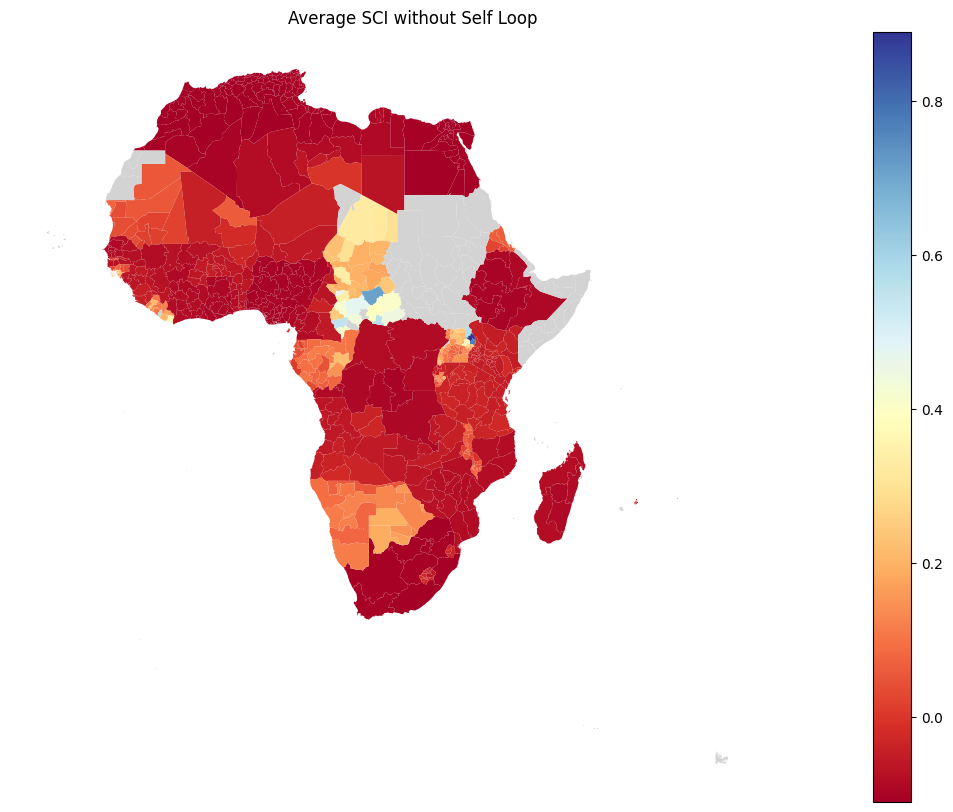

In [126]:
sci = pd.read_csv("external_dataset/sci_indices.csv")
sci_lmic = gpd.GeoDataFrame(sci.merge(gadm_1_geo, left_on='user_loc', right_on='GID_1', how='right'))
mean_value = sci_lmic['Mean_SCI_without_Self'].mean()
max_value =  sci_lmic['Mean_SCI_without_Self'].max()
min_value = sci_lmic['Mean_SCI_without_Self'].min()
sci_lmic['Mean_SCI_without_Self'] = sci_lmic['Mean_SCI_without_Self'].apply(lambda x: (x - mean_value) / (max_value - min_value))

sci_lmic_raw = sci_lmic.to_crs("3857")
missing_kwds = dict(color='lightgrey', label='No Data')
sci_lmic_raw.plot(figsize=(15,10),column='Mean_SCI_without_Self',legend=True,cmap='RdYlBu',missing_kwds=missing_kwds)
plt.axis('off')
plt.title("Average SCI without Self Loop")
plt.savefig("images/Mean_SCI_without_Self.png")
plt.show()

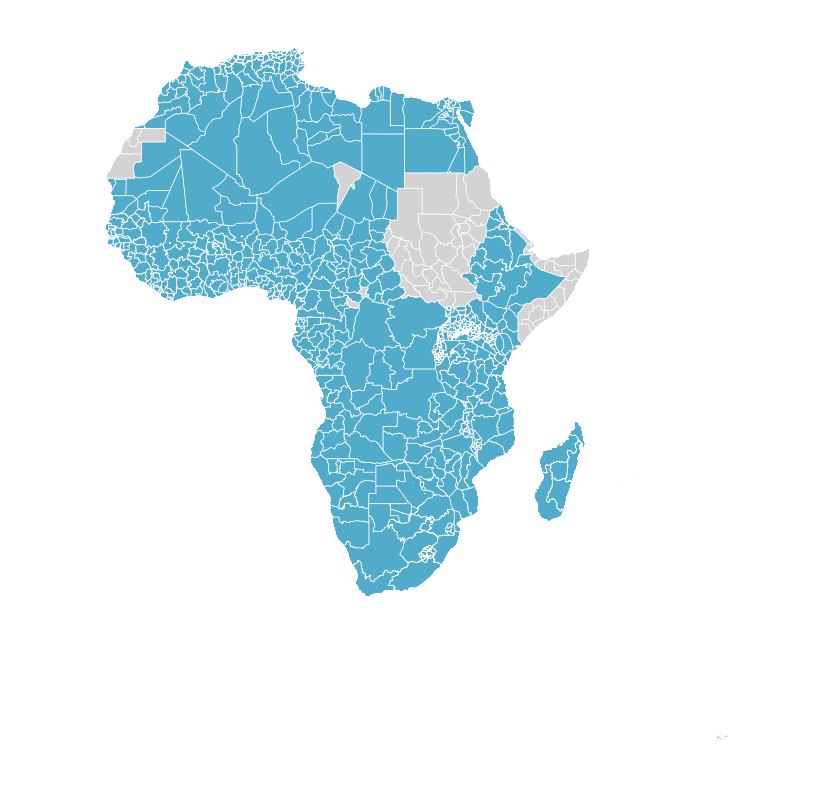

In [103]:
sci = pd.read_csv("external_dataset/sci_indices.csv")
sci["Mean_SCI_without_Self"] = 1
sci_lmic = gpd.GeoDataFrame(sci.merge(gadm_1_geo, left_on='user_loc', right_on='GID_1', how='right'))

sci_lmic_raw = sci_lmic.to_crs("3857")
missing_kwds = dict(color='lightgrey', label='No Data')
cmp = ListedColormap(["#51abcb"])
sci_lmic_raw.plot(figsize=(15,10),column='Mean_SCI_without_Self',cmap=cmp, edgecolor='white', lw=0.5,missing_kwds=missing_kwds)
plt.axis('off')
#plt.savefig("images/Mean_SCI_without_Self.png")
plt.show()

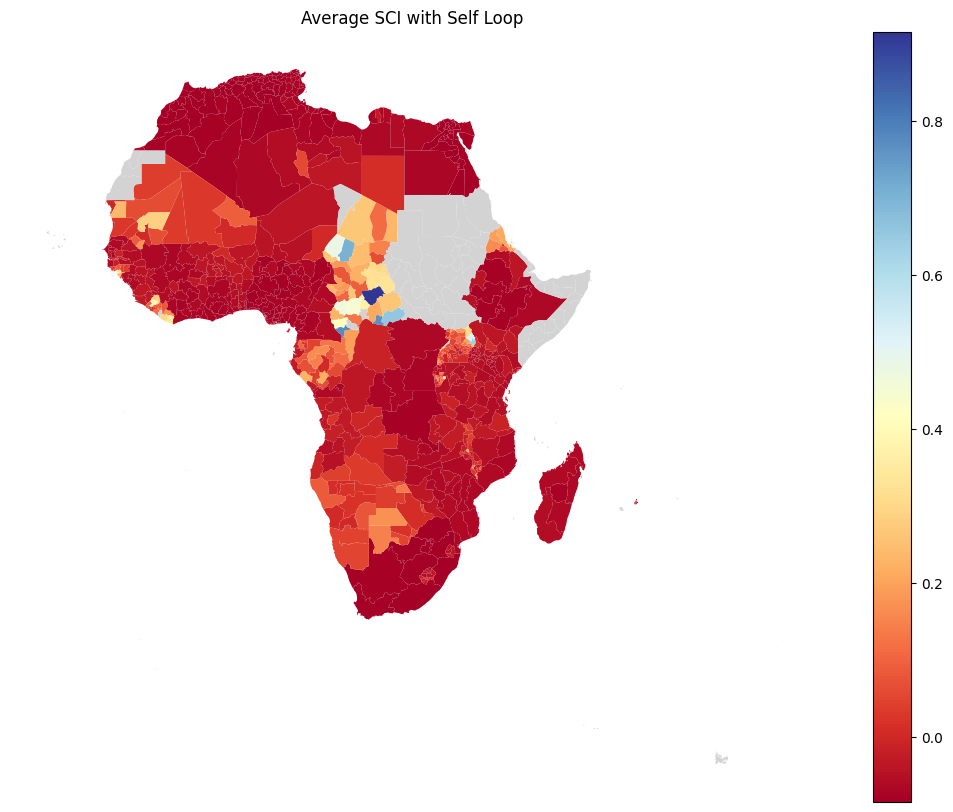

In [125]:
sci = pd.read_csv("external_dataset/sci_indices.csv")
sci_lmic = gpd.GeoDataFrame(sci.merge(gadm_1_geo, left_on='user_loc', right_on='GID_1', how='right'))
mean_value = sci_lmic['Mean_SCI_with_Self'].mean()
max_value =  sci_lmic['Mean_SCI_with_Self'].max()
min_value = sci_lmic['Mean_SCI_with_Self'].min()
sci_lmic['Mean_SCI_with_Self'] = sci_lmic['Mean_SCI_with_Self'].apply(lambda x: (x - mean_value) / (max_value - min_value))

sci_lmic_raw = sci_lmic.to_crs("3857")
missing_kwds = dict(color='lightgrey', label='No Data')
sci_lmic_raw.plot(figsize=(15,10),column='Mean_SCI_with_Self',legend=True,cmap='RdYlBu',missing_kwds=missing_kwds)
plt.axis('off')
plt.title("Average SCI with Self Loop")
plt.savefig("images/Mean_SCI_with_Self.png")
plt.show()

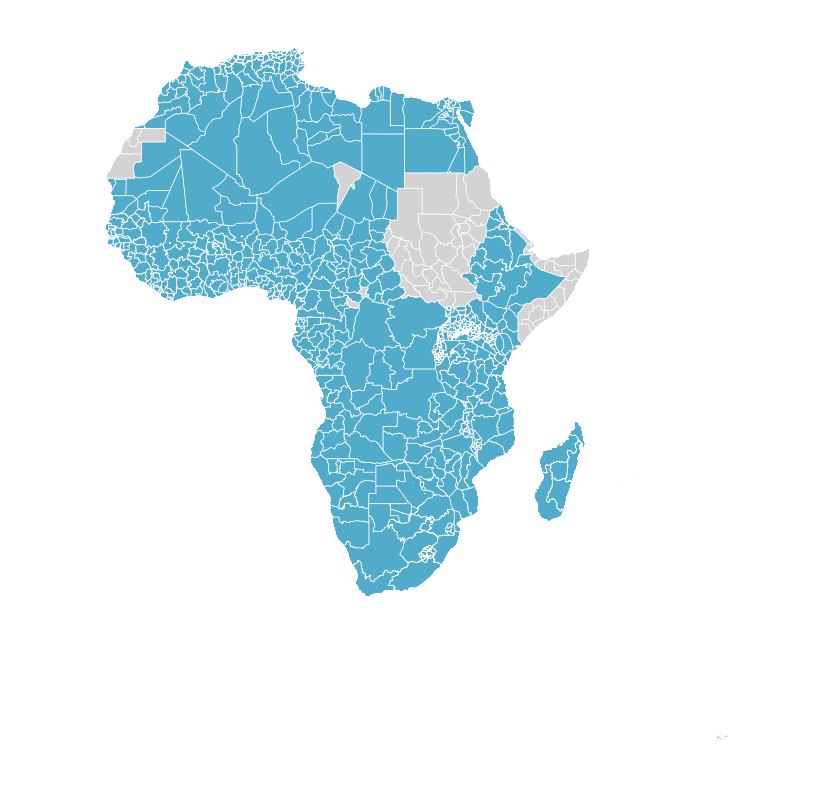

In [107]:
sci = pd.read_csv("external_dataset/sci_indices.csv")
sci['Mean_SCI_with_Self'] = 1
sci_lmic = gpd.GeoDataFrame(sci.merge(gadm_1_geo, left_on='user_loc', right_on='GID_1', how='right'))

sci_lmic_raw = sci_lmic.to_crs("3857")
missing_kwds = dict(color='lightgrey', label='No Data')
cmp = ListedColormap(["#51abcb"])
sci_lmic_raw.plot(figsize=(15,10),column='Mean_SCI_with_Self',cmap=cmp, edgecolor='white', lw=0.5,missing_kwds=missing_kwds)
plt.axis('off')
#plt.savefig("images/Mean_SCI_with_Self.png")
plt.show()

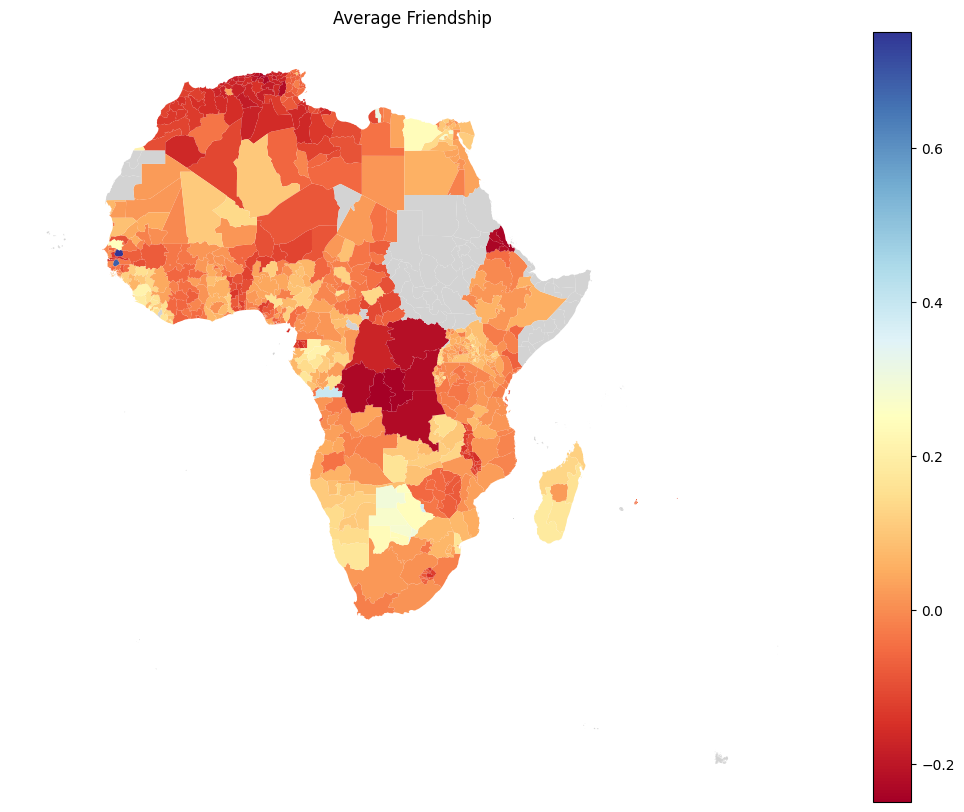

In [124]:
sci = pd.read_csv("external_dataset/sci_indices.csv")
sci_lmic = gpd.GeoDataFrame(sci.merge(gadm_1_geo, left_on='user_loc', right_on='GID_1', how='right'))
mean_value = sci_lmic['Mean_friendship'].mean()
max_value =  sci_lmic['Mean_friendship'].max()
min_value = sci_lmic['Mean_friendship'].min()
sci_lmic['Mean_friendship'] = sci_lmic['Mean_friendship'].apply(lambda x: (x - mean_value) / (max_value - min_value))

sci_lmic_raw = sci_lmic.to_crs("3857")
missing_kwds = dict(color='lightgrey', label='No Data')
cmp = ListedColormap(["#51abcb"])
sci_lmic_raw.plot(figsize=(15,10),column='Mean_friendship',legend=True,cmap="RdYlBu", missing_kwds=missing_kwds)
plt.axis('off')
plt.title("Average Friendship")
plt.savefig("images/Mean_friendship.png")
plt.show()

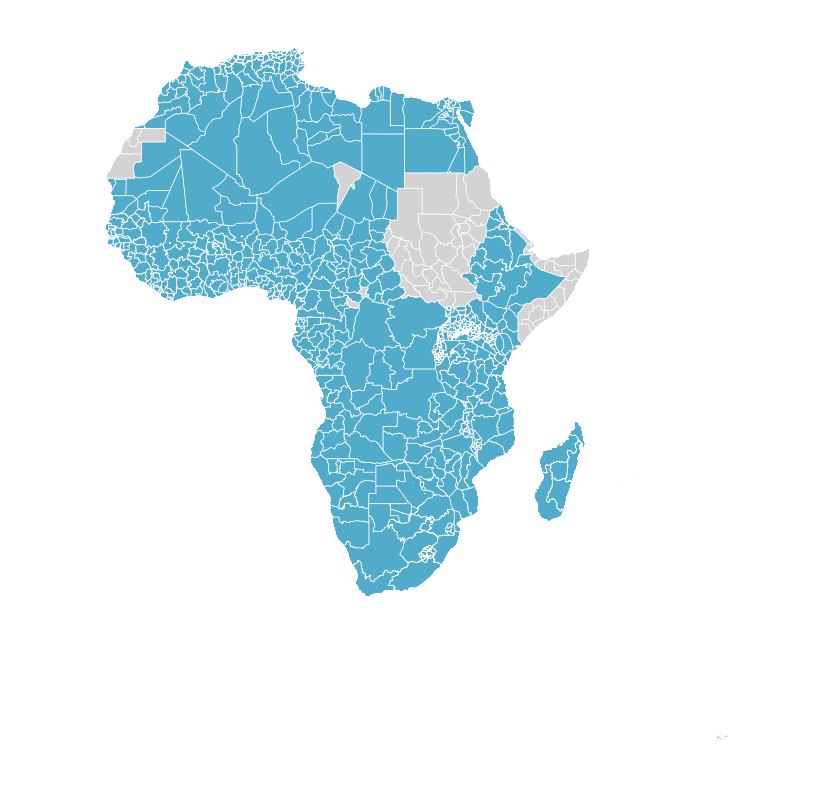

In [110]:
sci = pd.read_csv("external_dataset/sci_indices.csv")
sci['Mean_friendship'] = 1
sci_lmic = gpd.GeoDataFrame(sci.merge(gadm_1_geo, left_on='user_loc', right_on='GID_1', how='right'))

sci_lmic_raw = sci_lmic.to_crs("3857")
missing_kwds = dict(color='lightgrey', label='No Data')
cmp = ListedColormap(["#51abcb"])
sci_lmic_raw.plot(figsize=(15,10),column='Mean_friendship',cmap=cmp, edgecolor='white', lw=0.5,missing_kwds=missing_kwds)
plt.axis('off')
#plt.savefig("images/Mean_friendship.png")
plt.show()

### Centrality Measures

In [135]:
centrality_measures = pd.read_csv("external_dataset/all_centrality_measures.csv")
centrality_measures.head()

,Unnamed: 0,user_loc,degree,betweenness,closeness
0,0,ABW,0.952679,0.000026,0.954589
1,1,AGO1,0.705934,0.000009,0.772609
2,2,AGO10,0.930396,0.000031,0.934706
3,3,AGO11,0.990361,0.000042,0.990207
4,4,AGO12,0.800451,0.000017,0.833472


In [136]:
centrality_measures_lmic = gpd.GeoDataFrame(centrality_measures.merge(lmic, left_on="user_loc", right_on="GID_1", how="inner"))
centrality_measures_lmic = centrality_measures_lmic.to_crs("3857")

In [39]:
centrality_measures_lmic.head()

,Unnamed: 0,user_loc,degree,betweenness,closeness,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,GID_1,geometry
0,1,AGO1,0.705934,0.000009,0.772609,8,AGO,Angola,1,Bengo,AO.BO,0,1,Província,Province,NaN,NaN,AGO1,"MULTIPOLYGON (((1461300.176 -875184.432, 14613..."
1,2,AGO10,0.930396,0.000031,0.934706,8,AGO,Angola,10,Huambo,AO.HM,0,9,Província,Province,NaN,NaN,AGO10,"POLYGON ((1790556.497 -1284086.788, 1792933.26..."
2,3,AGO11,0.990361,0.000042,0.990207,8,AGO,Angola,11,Luanda,AO.LU,0,11,Província,Province,NaN,Loanda,AGO11,"MULTIPOLYGON (((1469140.916 -1040333.109, 1469..."
3,4,AGO12,0.800451,0.000017,0.833472,8,AGO,Angola,12,Lunda Norte,AO.LN,0,12,Província,Province,NaN,NaN,AGO12,"POLYGON ((2278915.855 -771420.418, 2282783.144..."
4,5,AGO13,0.849399,0.000021,0.868922,8,AGO,Angola,13,Lunda Sul,AO.LS,0,13,Província,Province,NaN,NaN,AGO13,"POLYGON ((2442667.963 -941436.793, 2443543.167..."


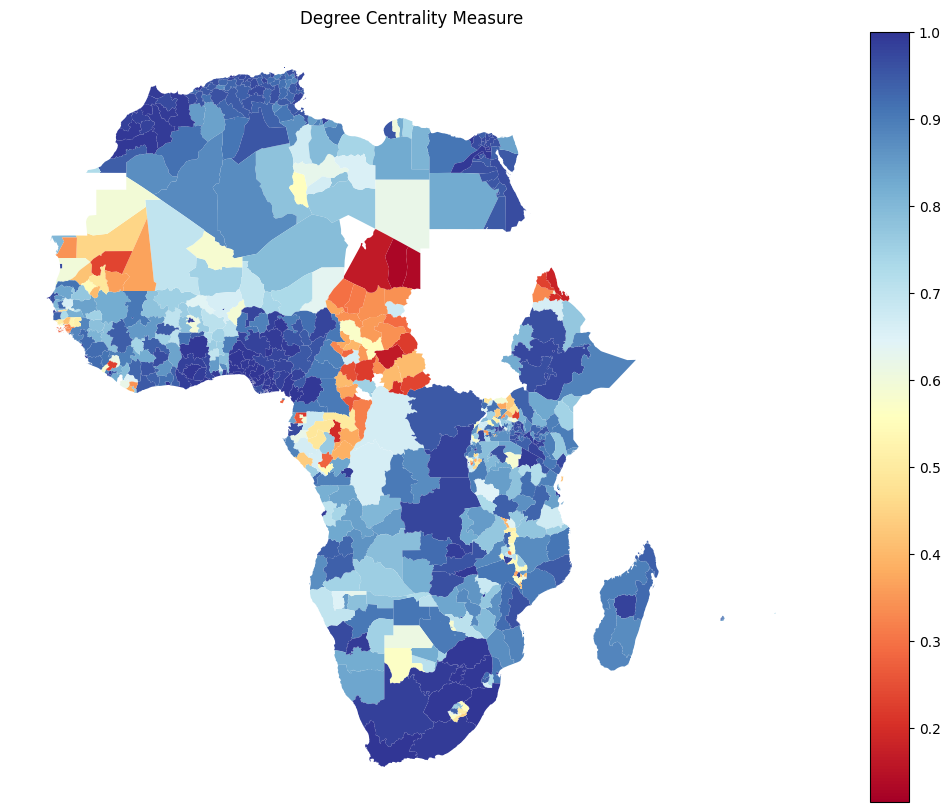

In [137]:
## All countries with data
#ax= centrality_measures_lmic.plot(figsize=(15,10),column='degree',legend=True, cmap='BrBG_r')
missing_kwds = dict(color='lightgrey', label='No Data')
centrality_measures_lmic.plot(figsize=(15,10),column='degree',legend=True,cmap='RdYlBu',missing_kwds=missing_kwds)
plt.axis('off')
plt.title("Degree Centrality Measure")
plt.savefig("images/Degree_Centrality.png")
plt.show()

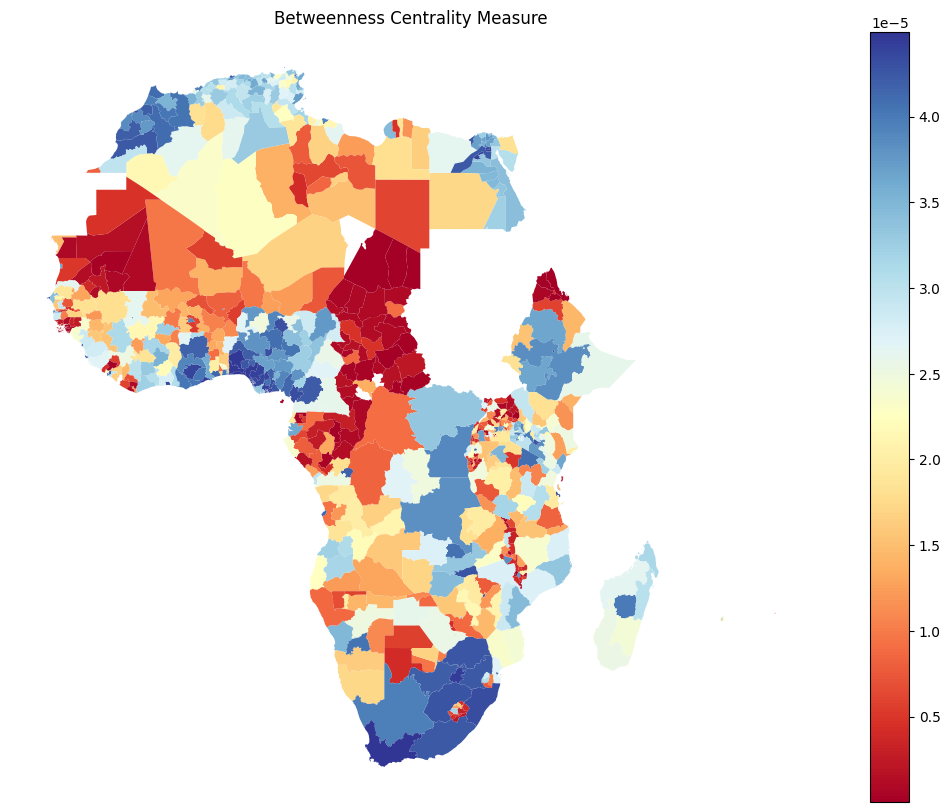

In [138]:
## All countries with data
missing_kwds = dict(color='lightgrey', label='No Data')
centrality_measures_lmic.plot(figsize=(15,10),column='betweenness',legend=True,cmap='RdYlBu',missing_kwds=missing_kwds)
plt.axis('off')
plt.title("Betweenness Centrality Measure")
plt.savefig("images/Betweenness_Centrality.png")
plt.show()

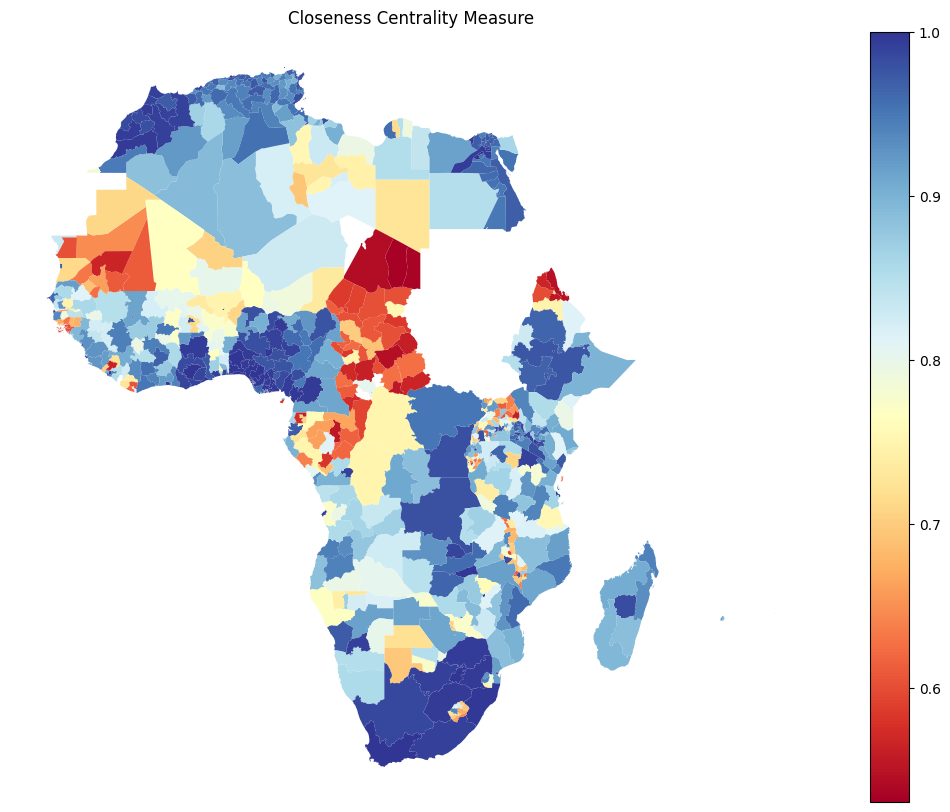

In [139]:
## All countries with data
missing_kwds = dict(color='lightgrey', label='No Data')
centrality_measures_lmic.plot(figsize=(15,10),column='closeness',legend=True,cmap='RdYlBu',missing_kwds=missing_kwds)
plt.axis('off')
plt.title("Closeness Centrality Measure")
plt.savefig("images/Closeness_Centrality.png")
plt.show()

### Centrality measure without self loop

In [43]:
centrality_measures_wo_self = pd.read_csv("external_dataset/all_centrality_measures_wo_self.csv")
centrality_measures_wo_self = gpd.GeoDataFrame(centrality_measures_wo_self.merge(lmic, left_on="user_loc", right_on="GID_1", how="inner"))
centrality_measures_wo_self = centrality_measures_wo_self.to_crs("3857")

In [44]:
centrality_measures_wo_self.head()

,Unnamed: 0,user_loc,degree_wo_self,betweenness_wo_self,closeness_wo_self,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,GID_1,geometry
0,1,AGO1,0.705684,0.000009,0.772609,8,AGO,Angola,1,Bengo,AO.BO,0,1,Província,Province,NaN,NaN,AGO1,"MULTIPOLYGON (((1461300.176 -875184.432, 14613..."
1,2,AGO10,0.930145,0.000031,0.934706,8,AGO,Angola,10,Huambo,AO.HM,0,9,Província,Province,NaN,NaN,AGO10,"POLYGON ((1790556.497 -1284086.788, 1792933.26..."
2,3,AGO11,0.990110,0.000042,0.990207,8,AGO,Angola,11,Luanda,AO.LU,0,11,Província,Province,NaN,Loanda,AGO11,"MULTIPOLYGON (((1469140.916 -1040333.109, 1469..."
3,4,AGO12,0.800200,0.000017,0.833472,8,AGO,Angola,12,Lunda Norte,AO.LN,0,12,Província,Province,NaN,NaN,AGO12,"POLYGON ((2278915.855 -771420.418, 2282783.144..."
4,5,AGO13,0.849149,0.000021,0.868922,8,AGO,Angola,13,Lunda Sul,AO.LS,0,13,Província,Province,NaN,NaN,AGO13,"POLYGON ((2442667.963 -941436.793, 2443543.167..."


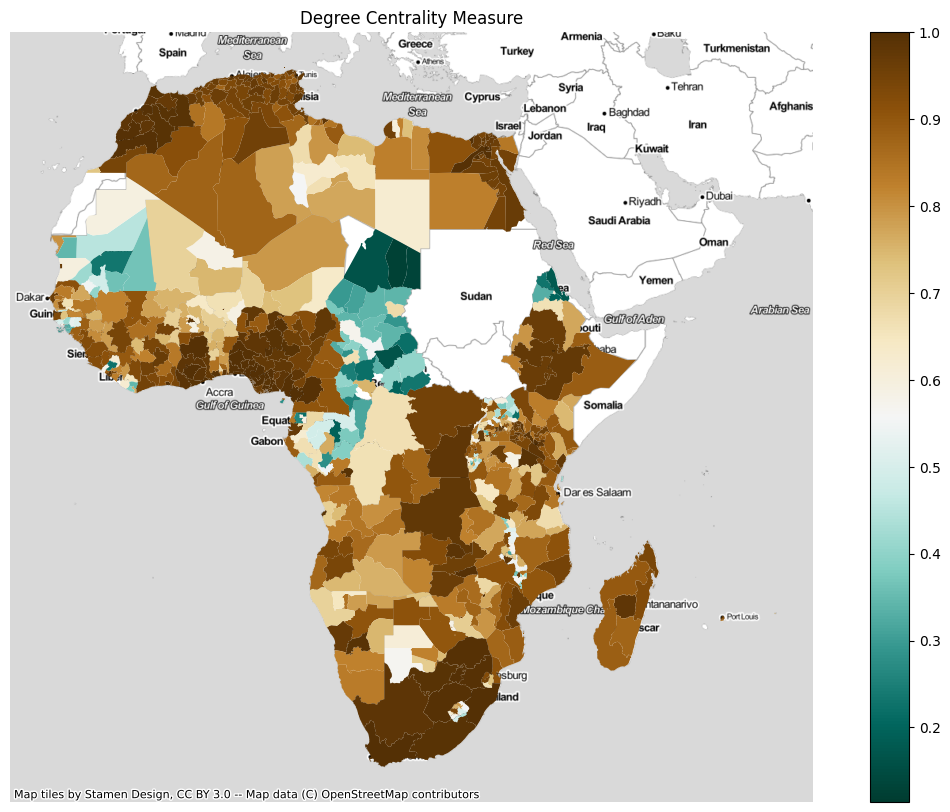

In [45]:
## All countries with data
ax= centrality_measures_wo_self.plot(figsize=(15,10),column='degree_wo_self',legend=True, cmap='BrBG_r')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
plt.axis('off')
plt.title("Degree Centrality Measure")
plt.savefig("images/Degree_Centrality_wo_self.png")
plt.show()

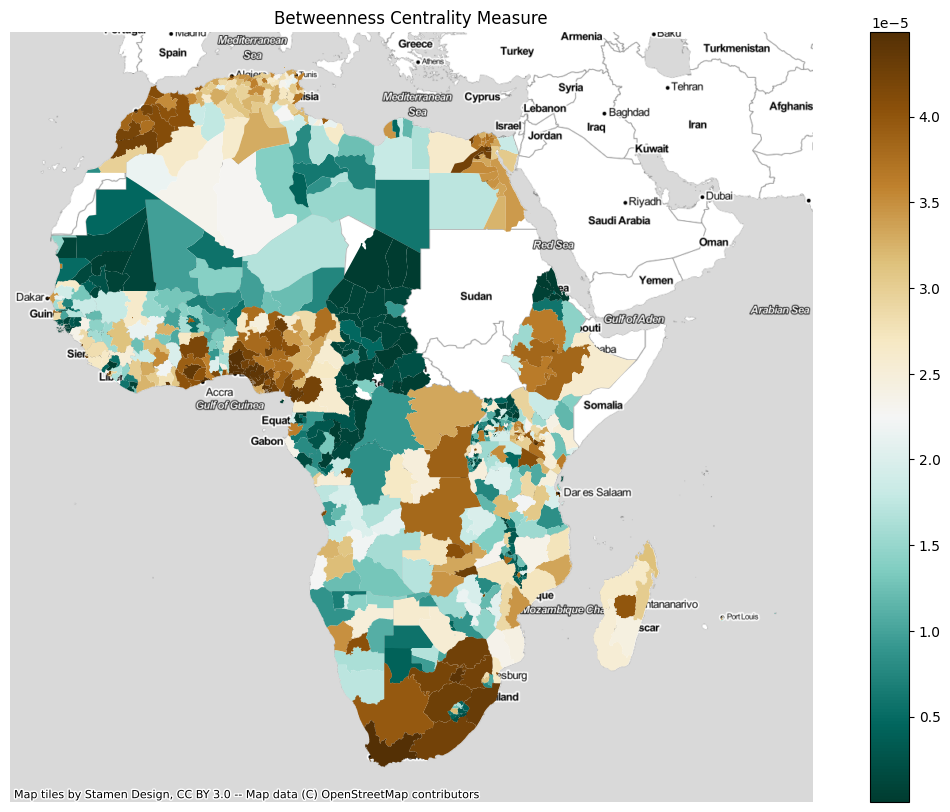

In [46]:
## All countries with data
ax= centrality_measures_wo_self.plot(figsize=(15,10),column='betweenness_wo_self',legend=True, cmap='BrBG_r')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
plt.axis('off')
plt.title("Betweenness Centrality Measure")
plt.savefig("images/Betweenness_Centrality_wo_self.png")
plt.show()

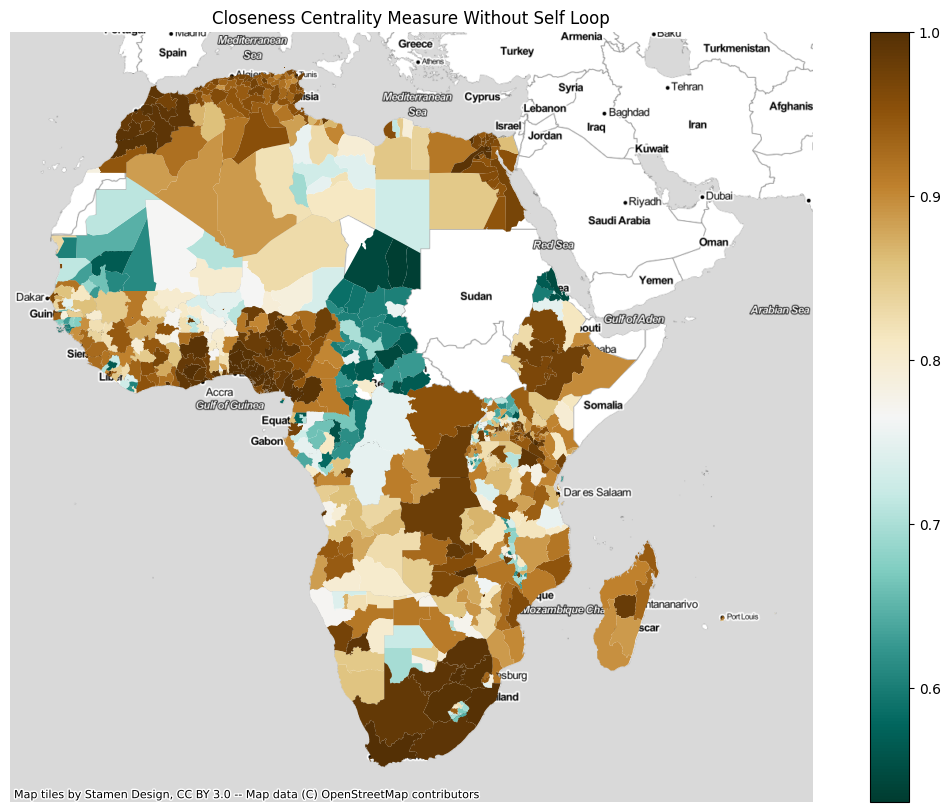

In [47]:
## All countries with data
ax= centrality_measures_wo_self.plot(figsize=(15,10),column='closeness_wo_self',legend=True, cmap='BrBG_r')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
plt.axis('off')
plt.title("Closeness Centrality Measure Without Self Loop")
plt.savefig("images/Closeness_Centrality_wo_self.png")
plt.show()

### FaceBook data

In [29]:
selected_cols = [x for x in gadm_1.columns.tolist() if 'SCI' in x] + [x for x in gadm_1.columns.tolist() if 'FB_pntr' in x] + [x for x in gadm_1.columns.tolist() if 'connection_index' in x] 
FB_pntr_sci = gadm_1.filter(selected_cols)

In [30]:
FB_pntr_sci = FB_pntr_sci.dropna()

In [31]:
FB_pntr_sci.head()

,Mean_SCI_with_Self,Median_SCI_with_Self,Std_SCI_with_Self,SCI,Mean_SCI_without_Self,Median_SCI_without_Self,Std_SCI_without_Self,Mean_dist_to_SCI,Median_dist_to_SCI,Std_dist_to_SCI,...,FB_pntr_15to49_female,FB_pntr_15to49_male,FB_pntr_18to24_all,FB_pntr_18to24_female,FB_pntr_18to24_male,FB_pntr_18to49_all,FB_pntr_18to49_female,FB_pntr_18to49_male,Intraconnection_index,LMIC_interconnection_index
0,696.570284,24.0,10536.898519,5564900,644.215448,24.0,9441.361664,38.787583,39.158016,19.172216,...,0.628039,1.000000,0.912292,0.684815,1.000000,0.883215,0.694858,1.000000,0.075277,0.831708
1,764.617474,8.0,32983.109986,6108529,406.319980,8.0,7892.321344,37.881024,38.270044,19.005464,...,0.072651,0.201664,0.186524,0.110891,0.278089,0.137935,0.076701,0.215076,0.468664,0.476444
2,1856.071098,11.0,121721.519195,14828152,498.239609,11.0,9314.991223,37.953148,38.065188,18.968335,...,0.071729,0.165704,0.178056,0.110860,0.233101,0.120130,0.070498,0.174835,0.731596,0.248339
3,2087.346977,12.0,132412.978011,16675815,610.569604,12.0,10498.993410,37.064183,37.188574,18.767780,...,0.029812,0.090889,0.087751,0.046745,0.131175,0.061114,0.030955,0.089508,0.707527,0.277444
4,3582.800976,8.0,272274.212869,28622997,538.656485,8.0,10033.398311,37.598482,37.623396,18.876677,...,0.187963,0.489291,0.438288,0.273804,0.614466,0.353035,0.205116,0.525189,0.849674,0.141557


In [32]:
# Normalised df
FB_pntr_sci_normed = (FB_pntr_sci-FB_pntr_sci.mean())/FB_pntr_sci.std()

In [33]:
FB_pntr_sci_normed.head()

,Mean_SCI_with_Self,Median_SCI_with_Self,Std_SCI_with_Self,SCI,Mean_SCI_without_Self,Median_SCI_without_Self,Std_SCI_without_Self,Mean_dist_to_SCI,Median_dist_to_SCI,Std_dist_to_SCI,...,FB_pntr_15to49_female,FB_pntr_15to49_male,FB_pntr_18to24_all,FB_pntr_18to24_female,FB_pntr_18to24_male,FB_pntr_18to49_all,FB_pntr_18to49_female,FB_pntr_18to49_male,Intraconnection_index,LMIC_interconnection_index
0,-0.716663,0.247610,-0.678619,-0.716663,-0.638219,0.248061,-0.547535,1.954616,2.192606,1.154093,...,2.229668,3.270056,2.630457,2.002710,2.698655,2.911851,2.404672,3.126091,-1.803987,1.609771
1,-0.701610,-0.679253,-0.596332,-0.701610,-0.764765,-0.678770,-0.572584,1.759870,2.003521,1.094886,...,-0.308827,0.015689,-0.106949,-0.278343,0.105191,-0.177277,-0.316251,0.014096,0.107852,-0.223159
2,-0.460163,-0.505466,-0.271021,-0.460163,-0.715869,-0.504989,-0.549578,1.775364,1.959898,1.081703,...,-0.313038,-0.130899,-0.138888,-0.278463,-0.056431,-0.251075,-0.343555,-0.145449,1.385688,-1.400035
3,-0.409001,-0.447537,-0.231827,-0.409001,-0.656116,-0.447062,-0.530431,1.584397,1.773231,1.010494,...,-0.504630,-0.435877,-0.479494,-0.533290,-0.422600,-0.495692,-0.517613,-0.483744,1.268713,-1.249873
4,-0.078182,-0.679253,0.280898,-0.078182,-0.694370,-0.678770,-0.537961,1.699175,1.865823,1.049159,...,0.218227,1.188184,0.842641,0.369153,1.313623,0.714298,0.248990,1.243602,1.959540,-1.950961


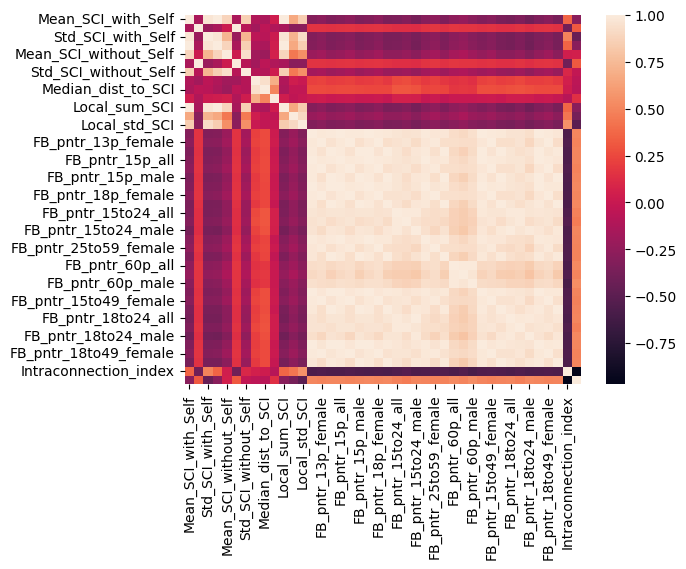

In [34]:
sns.heatmap(FB_pntr_sci.corr())
plt.show()

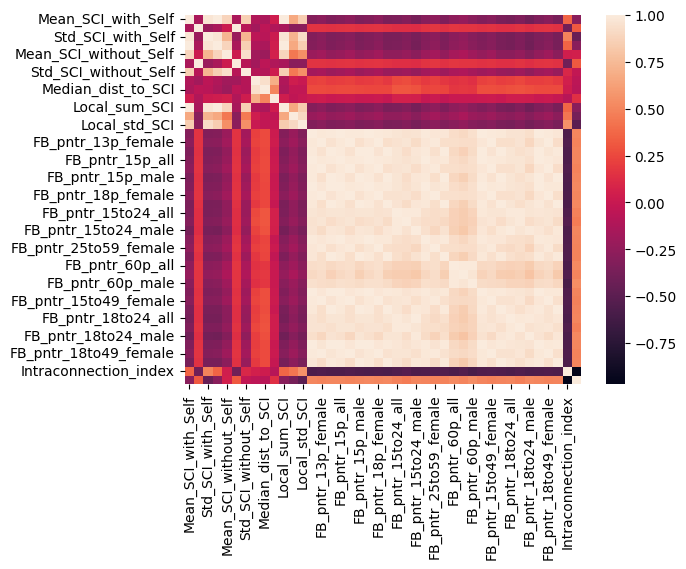

In [35]:
sns.heatmap(FB_pntr_sci_normed.corr())
plt.show()

### World Pop Data

In [5]:
wp =  pd.read_csv("external_dataset/wp.csv")

In [6]:
wp.head()

,Unnamed: 0,GID_1,Mean_of_Night_Light,Std_of_Night_Light,Mean_distance_to_major_rd_intersection,Std_distance_to_major_rd_intersection,Mean_distance_to_major_rd,Std_distance_to_major_rd,Mean_distance_to_inland_water,Std_distance_to_inland_water,Mean_built_settlement_growth,Std_built_settlement_growth
0,0,SEN1,7.176919,0.621748,3.293481,0.174721,1.573489,0.091997,3.213580,0.176993,239.832837,10.014970
1,1,SEN2,0.257264,0.157736,21.659406,3.353317,3.470620,0.548351,33.594360,4.749283,239.850495,29.213909
2,2,SEN3,0.053988,0.026250,17.241502,2.955293,5.249177,1.001454,12.854151,2.863131,239.913755,34.018264
3,3,SEN4,0.043369,0.042297,53.902970,10.556454,8.846812,2.176742,41.094880,8.812414,239.957290,44.068033
4,4,SEN5,0.097239,0.060448,22.814258,3.467939,4.644868,0.718119,9.393709,1.541813,239.925571,30.714515


In [55]:
dhs = pd.read_csv("external_dataset/dhs_health_by_sex_mobile.csv")

In [56]:
dhs.head()

,GID_1,rel_major,rel_minor,lang_major,lang_minor,middle,poorer,poorest,richer,richest,...,evangelical presbyterian,pentecotist,baha'i,jehovah's witness,jewish,mammon,pentecostal/born again/evangelical,presbyterian,salvation army,apostolic sect
0,AGO1,0.240489,0.759511,1.0,0.0,0.259511,0.298913,0.116848,0.183424,0.141304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO1,0.240489,0.759511,1.0,0.0,0.259511,0.298913,0.116848,0.183424,0.141304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO1,0.240489,0.759511,1.0,0.0,0.259511,0.298913,0.116848,0.183424,0.141304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO1,0.240489,0.759511,1.0,0.0,0.259511,0.298913,0.116848,0.183424,0.141304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO1,0.240489,0.759511,1.0,0.0,0.259511,0.298913,0.116848,0.183424,0.141304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
[c for c in dhs.GID_1.unique().tolist() if "GHA" in c]

[]

### Afrobarometer Data

In [116]:
afro_data = pd.read_csv("external_dataset/afrobarometer.csv")

In [117]:
afro_data.head()

,GID_1,member_community,trpar,trtax,trgov,trlaw,trgen,trrel,trnei,tracq,railway_contact,explorer_contact,district_ethnic_frac,loc_ln_export_area,distsea,mp_service
0,AGO5,0.405539,1.797913,1.594165,1.576130,2.339686,0.138785,2.266605,1.565078,1.195634,NaN,NaN,NaN,NaN,NaN,0.848025
1,BDI1,0.188514,2.199007,1.458290,2.296894,1.825312,0.493148,2.950424,2.555475,2.363154,0.912780,0.818238,0.639920,0.00000,665.290474,1.000000
2,BDI10,0.467653,2.560470,1.995988,2.378769,2.006834,0.385746,2.906520,2.511846,1.978311,0.920271,0.733484,0.793243,0.00000,570.203296,0.764955
3,BDI11,0.425350,1.796678,1.056557,2.011232,1.569361,0.499859,2.877438,2.196248,1.472316,0.493532,0.542234,0.374068,0.01372,654.538093,0.842943
4,BDI12,0.506870,2.210208,1.502377,2.285795,1.959690,0.563051,2.973911,2.444563,2.209979,0.948109,1.000000,0.627917,0.00000,675.539608,1.000000


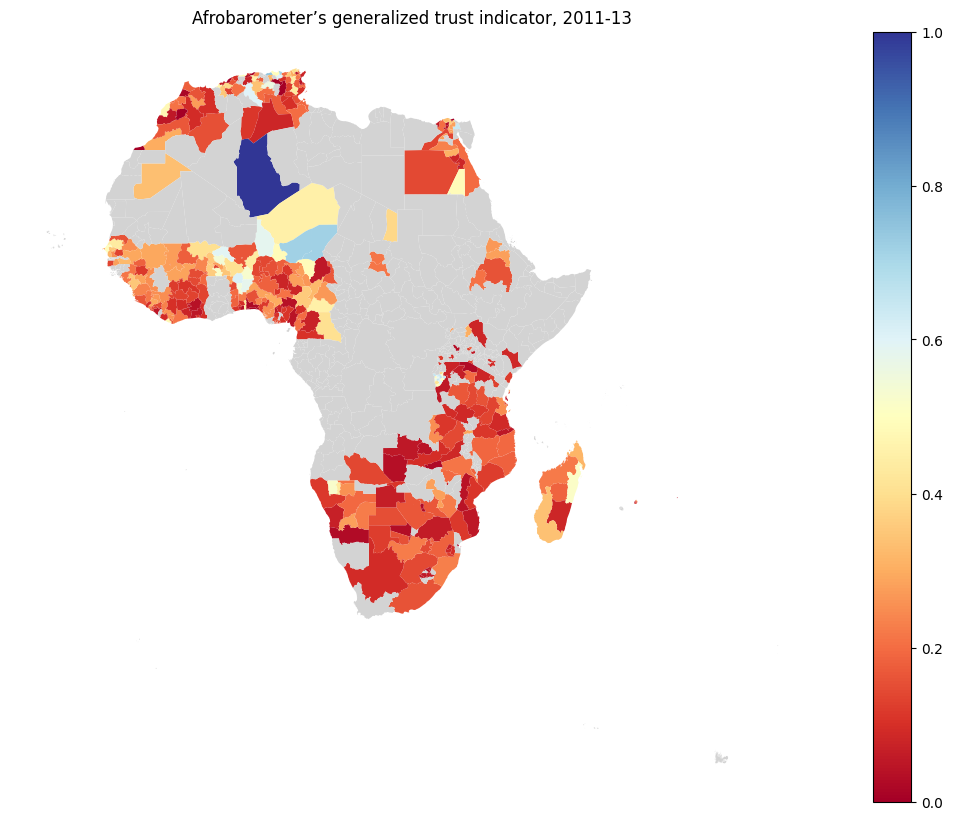

In [123]:
afro_data_cx = gpd.GeoDataFrame(afro_data.merge(gadm_1_geo, on="GID_1", how="right"))
afro_data_cx = afro_data_cx.to_crs("3857")
afro_data_cx.plot(figsize=(15,10),column='trgen',legend=True, cmap='RdYlBu',missing_kwds=missing_kwds)
plt.axis('off')
plt.title("Afrobarometer’s generalized trust indicator, 2011-13")
plt.savefig("images/trgen.png")
plt.show()

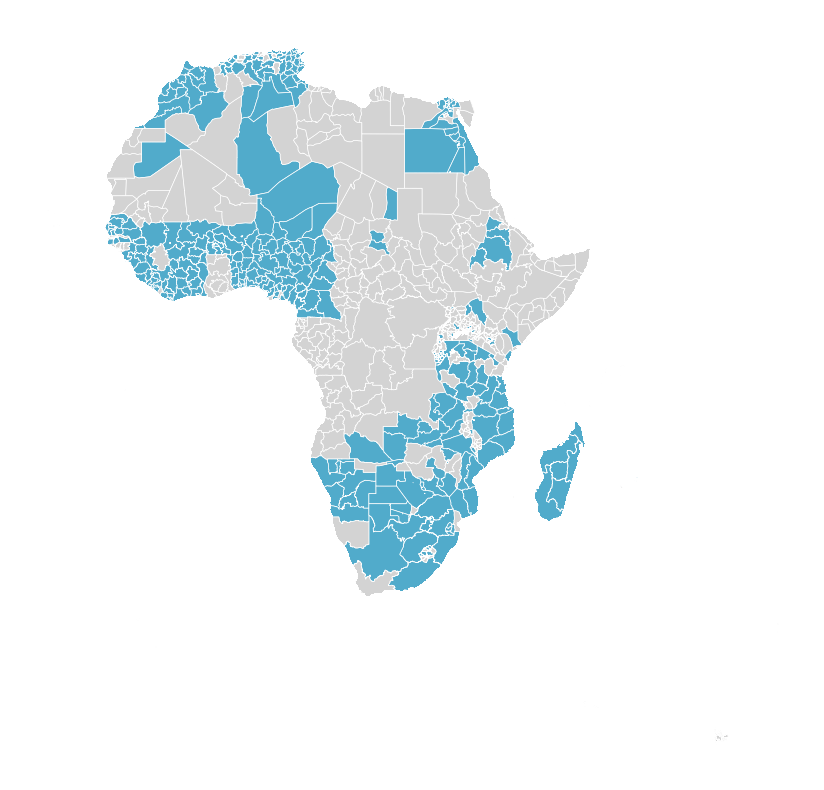

In [115]:
afro_data = pd.read_csv("external_dataset/afrobarometer.csv")
afro_data['trgen'] = 1
afro_data_raw = gpd.GeoDataFrame(afro_data.merge(gadm_1_geo, on="GID_1", how="right"))
afro_data_raw = afro_data_raw.to_crs("3857")
cmp = ListedColormap(["#51abcb"])
afro_data_raw.plot(figsize=(15,10),column='trgen',cmap=cmp, edgecolor='white', lw=0.5,missing_kwds=missing_kwds)
plt.axis('off')
#plt.title("Afro-Barometer Trust Measure")
#plt.savefig("images/trgen.png")
plt.show()

In [13]:
hdi = pd.read_csv("external_dataset/hdi.csv")

In [14]:
hdi.head()

,Unnamed: 0,GID_1,HDI
0,0,SEN1,0.607
1,1,SEN2,0.589
2,2,SEN3,0.390
3,3,SEN4,0.464
4,4,SEN5,0.454
